In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import curve_fit #argumentos (function,xdata,ydata)

## Funções de ajuste e auxiliares

In [5]:
def linearf(x, m, b):
    return m * x + b

def r2(y, ymodel):
    yMean = np.mean(y)
    SSres = np.sum( (y - ymodel)**2 )
    SStot = np.sum( (y - yMean)**2 )
    return 1 - SSres/SStot

# Parte 1
## Calibração
Daqui acho que se retira uma relação entre $B$ e $I$ para se usar mais tarde, uma vez que $I$ será controlado mas $B$ não.

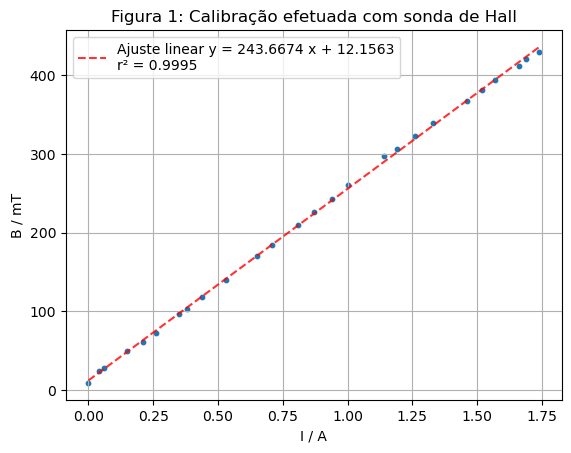

1.74


In [7]:
data1 = pd.read_csv('DadosCSV/parte1.csv', delimiter = '\t')

#esta parte é de calibração
I1 = np.array(data1['I(A)'][:26])
B1 = np.array(data1['mT'][:26])

params1, covari1 = curve_fit(linearf, I1, B1) 
label1 = f"Ajuste linear y = {params1[0]:.4f} x + {params1[1]:.4f}\nr² = {r2(B1, linearf(I1, params1[0], params1[1])):.4f}"

plt.title('Figura 1: Calibração efetuada com sonda de Hall')

plt.plot(I1, linearf(I1, params1[0], params1[1]), color = 'r', ls = '--', alpha = 0.8, label = label1)
plt.scatter(I1,B1, s= 10)

plt.xlabel('I / A')
plt.ylabel('B / mT')
plt.grid()
plt.legend()
plt.show()

print(data1['I(A)'][25]) #por causa disto cortam-se os dados pra apanhar na gama de interesse

In [9]:
print(covari1)

[[ 1.20911557 -1.02123762]
 [-1.02123762  1.24271047]]


# Parte 2
## Amostra com campo magnético fixo; variação da corrente

A partir da expressão $$U_H = \frac{d}{S}\frac{1}{n q} I B \sin(\theta)$$
Determina-se, sabendo que $\theta=\frac{\pi}{2}$, o coeficiente de Hall, dado por: $$R_H = \frac{1}{nq}$$
As dimensões dadas pelo enunciado são:
$$2cm \times 1cm \times 2.12 mm$$

In [4]:
S = 2

data2 = pd.read_csv('DadosCSV/parte2.csv', delimiter='\t')

data2.head()

,Ip(mA),Uh(mV),Vp(V)
0,-20,-30.642,-1.023
1,-19,-29.670,-0.990
2,-18,-27.800,-0.929
3,-17,-26.880,-0.898
4,-16,-25.642,-0.857


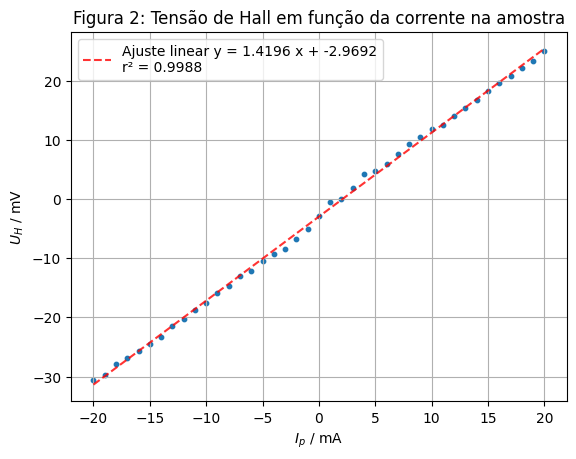

In [5]:
#será que trabalho com SI deste o início?

I2 = np.array(data2['Ip(mA)']) #mA
U2 = np.array(data2['Uh(mV)']) #mV
V2 = np.array(data2['Vp(V)']) #V

params2, covari2 = curve_fit(linearf, I2, U2) 
label2 = f"Ajuste linear y = {params2[0]:.4f} x + {params2[1]:.4f}\nr² = {r2(U2, linearf(I2, params2[0], params2[1])):.4f}"

plt.title('Figura 2: Tensão de Hall em função da corrente na amostra')

plt.plot(I2, linearf(I2, params2[0], params2[1]), color = 'r', ls = '--', alpha = 0.8, label = label2)
plt.scatter(I2,U2, s= 10)

plt.xlabel('$I_p$ / mA')
plt.ylabel('$U_H$ / mV')
plt.grid()
plt.legend()
plt.show()

Aqui em baixo faz-se um gráfico de $V_p(I_p)$ que suponho que deverá ser linear pela lei de Ohm.

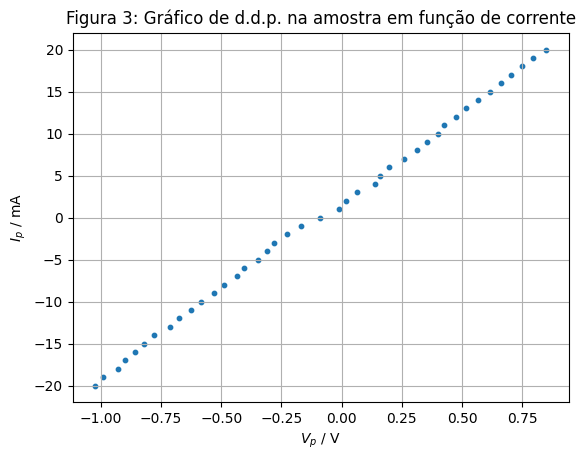

In [12]:
plt.title('Figura 3: Gráfico de d.d.p. na amostra em função de corrente')
plt.scatter(V2,I2, s= 10)
plt.ylabel('$I_p$ / mA')
plt.xlabel('$V_p$ / V')
plt.grid()
plt.show()

## Parte 3

Agora vai-se obter a relação entre a tensão de Hall e o campo magnético criado pelas bobinas.

Para isso, mediu-se a corrente $I_b$ e, usando o modelo $B(I)$, converteu-se essa corrente em campo magnético.

In [30]:
def BI(I): #recebe a corrente e cospe o campo que deve estar a ser gerado
    return paramsB[0]*I + paramsB[1]

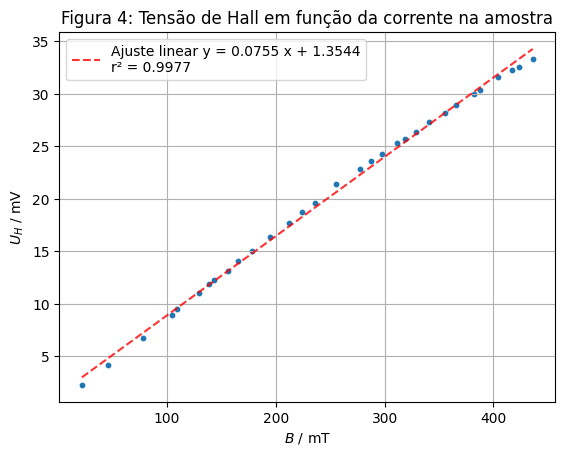

In [31]:
data3 = pd.read_csv('DadosCSV/parte3.csv', delimiter='\t')

#Relembro que só se tem o modelo de B(I) até 1.74 (aumentei um pouco porque ainda era linear nessa zona, então vou cortar os pontos de I superiores a esse


I3 = np.array(data3['Ib(A)'][:-2]) #mA
B3 = BI(I3)
U3 = np.array(data3['Uh(mV)'][:-2]) #mV
V3 = np.array(data3['Up(V)'][:-2]) #V

params3, covari3 = curve_fit(linearf, B3, U3)

label3 = f"Ajuste linear y = {params3[0]:.4f} x + {params3[1]:.4f}\nr² = {r2(U3, linearf(B3, params3[0], params3[1])):.4f}"

plt.title('Figura 4: Tensão de Hall em função da corrente na amostra')

plt.plot(B3, linearf(B3, params3[0], params3[1]), color = 'r', ls = '--', alpha = 0.8, label = label3)
plt.scatter(B3,U3, s= 10)

plt.xlabel('$B$ / mT')
plt.ylabel('$U_H$ / mV')
plt.grid()
plt.legend()
plt.show()

## Parte 4

Fez-se variar a temperatura, fixando $I_b= 1 \space A$ e $I_p = 18 \space mA$ (corrente nas bobinas e na amostra, respetivamente). O vídeo foi gravado pelo telemóvel do Miguel, e em casa anotou-se os valores de $U_h$, em $mV$, e a tensão na amostra $V_p$, que variava com a temperatura.

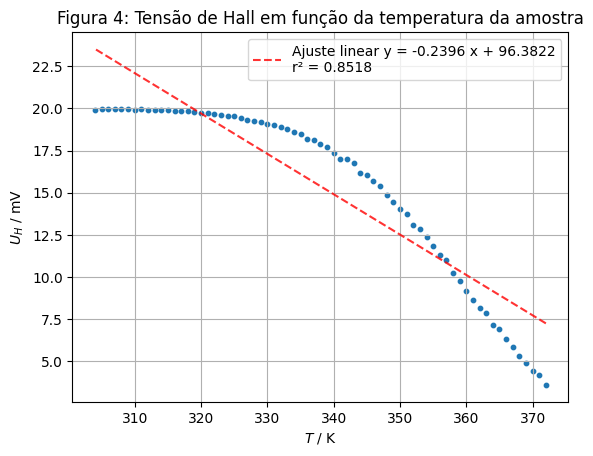

In [41]:
data4 = pd.read_csv('DadosCSV/parte4.csv', delimiter=';')

T4 = np.array(data4['T(K)']) #K
U4 = np.array(data4['Uh(mV)']) #mV
V4 = np.array(data4['V(mV)']) #mV

params4, covari4 = curve_fit(linearf, T4,U4)


label4 = f"Ajuste linear y = {params4[0]:.4f} x + {params4[1]:.4f}\nr² = {r2(U4, linearf(T4, params4[0], params4[1])):.4f}"

plt.title('Figura 4: Tensão de Hall em função da temperatura da amostra')

plt.plot(T4, linearf(T4, params4[0], params4[1]), color = 'r', ls = '--', alpha = 0.8, label = label4)
plt.scatter(T4, U4, s= 10)

plt.xlabel('$T$ / K')
plt.ylabel('$U_H$ / mV')
plt.grid()
plt.legend()
plt.show()

In [72]:
#Foi preciso definir uma função exponenial assim especial de corrida (tem uma constante aditiva)

def expA(x, A, B, c, T0):
    return A + B*np.exp(c*(x-T0))

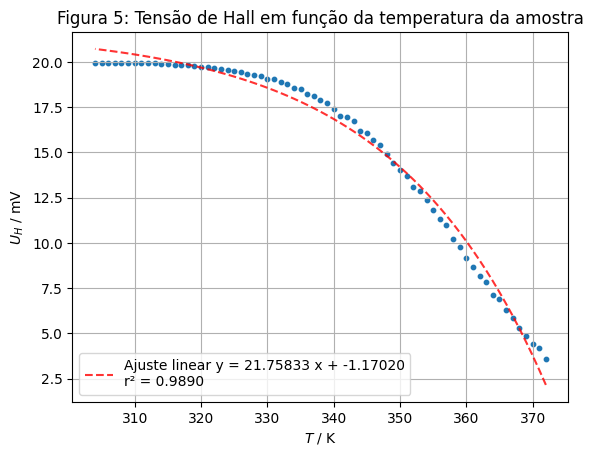

In [83]:
params5, covari5 = curve_fit(expA, T4, U4, [21, -1, 0.045, 310])


label5 = f"Ajuste linear y = {params5[0]:.5f} x + {params5[1]:.5f}\nr² = {r2(U4, expA(T4, params5[0], params5[1], params5[2], params5[3])):.4f}"

plt.title('Figura 5: Tensão de Hall em função da temperatura da amostra')

plt.plot(T4, expA(T4, params5[0], params5[1], params5[2], params5[3]), color = 'r', ls = '--', alpha = 0.8, label = label5)
plt.scatter(T4, U4, s= 10)

plt.xlabel('$T$ / K')
plt.ylabel('$U_H$ / mV')
plt.grid()
plt.legend()
plt.show()

array([ 2.17583346e+01, -1.17019770e+00,  4.32920524e-02,  3.06889574e+02])